# HW2: Random Variables

In this homework we will study how to:
1. sample random variables in python using [`numpy.random`](https://numpy.org/doc/1.16/reference/routines.random.html) 
2. describe their analytical properties using [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/stats.html)
3. use central limit theorem  to estimate the mean of random variables.

Problems 3.7, 3.8 and all of Problem 4 are bonus problems. You can do them if you have a bit more time and want to lear more but they will you do not need to complete them. 

## Preliminaries

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sbn

### Random Seed

In [2]:
seed=85032752
gen=np.random.default_rng(seed)

## Problem 1: Discrete Random Variable

A Poisson random variable has probability mass function (PMF):

$$
    P(x;\mu) = \frac{\mu^x}{x!}e^{-\mu} \ \ \text{for } x=0,1,2,\dots
$$
With mean 
$$
    \mathbb{E}[x] = \mu
$$
and variance
$$
    \text{Var}[x] = \mu
$$

[HINT] The parameter of the Poisson distribution is some times (like [scipy.stats](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html))
called $\mu$, and some times (like [numpy.random.Generator.poisson](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.poisson.html)) called $\lambda$. 


### Problem 1.1

use [scipy.stats.poisson](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html#scipy.stats.poisson) to define a Poison random variable with parameter $\mu=2$.



In [3]:
mu=2

In [4]:
poisson=stats.poisson(mu=mu) 
poisson

### Problem 1.2

Use functions [poisson.mean](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.mean.html#scipy.stats.rv_continuous.mean) and [poisson.std](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.mean.html#scipy.stats.rv_continuous.std) to compute the mean and standard deviation of the Poisson random variable defined in Problem 1.1.

Compare the results obtained by those functions to the analytic  formulas above.

[HINT] Standard deviation is just the squared root of variance.

In [5]:
poisson.mean(),poisson.std()

(2.0, 1.4142135623730951)

In [6]:
# analytic formula's in terms of mu
mean=mu
std=np.sqrt(mu)
mu,std

(2, 1.4142135623730951)

### Problem 1.3

Use [numpy.random.Generator.poisson](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.poisson.html) to generate $N=1,000$ independent samples from a Poisson Random variable.

In [7]:
N=1_000

In [8]:
C=gen.poisson(lam=mu,size=N)
C.shape

(1000,)

In [9]:
C[:10]

array([3, 3, 1, 1, 2, 4, 5, 0, 2, 1])

### Problem 1.4

Compute the mean and standard deviation of the samples and compare it to the analytic formulas for the mean and standard deviation.

In [10]:
C.mean(),C.std()

(2.053, 1.4953899157076056)

In [11]:
poisson.mean(),poisson.std()

(2.0, 1.4142135623730951)

### Problem 1.5

1. Using the function [numpy.arange](https://numpy.org/doc/stable/reference/generated/numpy.arange.html) generate an array with the numbers
   $x=0,1,2,\dots,9$
2. Use [scipy.stats.poisson.pmf](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_discrete.pmf.html#scipy.stats.rv_discrete.pmf) to generate the probabilities $P(x;\mu)$ for $x=0,1,2,\dots,9$ of the Poisson's variable defined in Problem 1.1 

In [12]:
x=np.arange(0,10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
pmf=poisson.pmf(x)
pmf

array([1.35335283e-01, 2.70670566e-01, 2.70670566e-01, 1.80447044e-01,
       9.02235222e-02, 3.60894089e-02, 1.20298030e-02, 3.43708656e-03,
       8.59271640e-04, 1.90949253e-04])

### Problem 1.6

We will now compare the distribution of Poisson samples generated in Problem 1.3 to the PMF of the Poisson distribution computed in problem 1.5

In a single jupyter cell

1. Use [seaborn](https://seaborn.pydata.org/)'s [seaborn.histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) to plot a histogram of the samples generated in Problem 1.3.
    1.  Define the `start` argument to the value `probability` so that the histogram is normalized as a pmf plot.
    2.  Define the `discrete` argument to the value `True` so that `histplot` sets the right defaults for a pmf instead of a pdf histogram plot.
    3. Define the `label` value to an appropriate value to show on the plot legend.
2. Use [matplolib.pyplot.bar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html) to define a bar plot of the PMF values for the poison distribution as you computed in problem 1.5
    1. Define the `width` argument to `0.1` so that the PMF values are a thin bar.
    2. Set the bars to a different color from the one chosen by `seaborn` for the sample histogram.
    3. Add a label to the PMF bars.
3. Add axis labels (using `xlabel` and `ylabel`)
4. Add a legend to the plot using [matplotlib.pyplot.legend](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html)


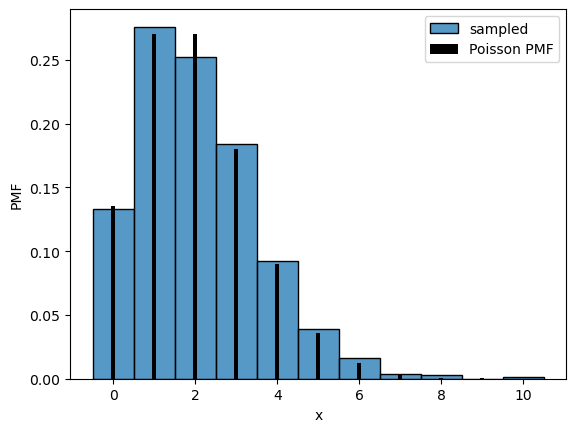

In [14]:
sbn.histplot(C,stat="probability",discrete=True,label="sampled")
plt.bar(x,pmf,width=0.1,color="black",label="Poisson PMF")
plt.xlabel("x")
plt.ylabel("PMF")
plt.legend()

## Problem 2: Continuos Random Variable

A **normalized** Student's T Random variable is defined as 

$$
    p(z;n) = \frac{\Gamma\left(\frac{n+1}{2}\right)}{\sqrt{n\pi}\Gamma\left(\frac{n}{2}\right)}\left(1 + \frac{z^2}{n} \right)^{-\frac{n+1}{2}}\ \ \ \ \text{where }\ -\infty < z < \infty 
$$

An a non-normalized Student's t random variable   is

\begin{align}
    X &= \mu + \sigma Z \\
    p(x;n,\mu,\sigma) &= p(\frac{x-\mu}{\sigma};n)
\end{align}

The mean and variance of $X$ are defined as 
\begin{align}
    \mathbb{E}(X) &= \mu \\
    \text{Var}(X) &= \frac{n}{n-2}\sigma^2
\end{align}

### Problem 2.1

Using [scipy.stats.t](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html) define a Student's t random variable with parameters:
\begin{align}
    n&=3 \\
    \mu&=0.1 \\
    \sigma&=1 
\end{align}
[HINT] In [scipy.stats.t](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html) the three parameters are named `df`, `loc` and `scale`.

In [15]:
mu=0.1
sigma=1
df=3

In [16]:
student=stats.t(df=df,loc=mu,scale=sigma)


### Problem 2.2

Use the distribution's functions `mean` and `std` to compute the analytical mean and standard deviation of the random variable defined in Problem 2.1.

Compare it to the analytical expressions.

In [17]:
student.mean(),student.std()

(0.1, 1.7320508075688772)

In [18]:
mean=mu
std=np.sqrt(df/(df-2))*(sigma)
mu,std

(0.1, 1.7320508075688772)

### Problem 2.3

1. Use [numpy.random.Generator.standard_t](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.standard_t.html)
to define $N=10,000$ random samples of a $n=3$ **normalized** Student's T distribution $Z$.

2. Use the formulas in the introduction to Problem 2, to define a variable $X$
with a $T$ distribution with the same parameters of Problem 2.1




In [19]:
N=10_000

In [20]:
Z=gen.standard_t(df,size=N)

In [21]:
T=mu+sigma*Z
T.shape

(10000,)

### Problem 2.4

Compare the sample mean and standard deviation of the Student's t distribution  to the values you computed analytically

In [22]:
T.mean(),T.std()

(0.12403130654203628, 1.7496383007426115)

In [23]:
student.mean(),student.std()

(0.1, 1.7320508075688772)

### Problem 2.5

Generate 201 equally spaced values of $x$ between -5 and 5 using function [numpy.linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html).

Compute the Probability Density function of $X$ for each value of $x$ using [scipy.stats.t.pdf](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.pdf.html)


In [24]:
x=np.linspace(-5,5,201)
pdf=student.pdf(x)

### Problem 2.6

We will not compare the distribution of Student's T samples generated in Problem 2.3 to the PDF of the Student's T  distribution computed in problem 2.5

In a single jupyter cell

1. Use [seaborn](https://seaborn.pydata.org/)'s [seaborn.histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) to plot a histogram of the samples generated in Problem 1.3.
    1.  Define the `start` argument to the value `density` so that the histogram is normalized as a pdf plot with area 1.
    2.  Define the `discrete` argument to the value `False` so that `histplot` sets the right defaults for a pdf instead of a discrete pmf histogram plot.
    3. Define the `label` value to an appropriate value to show on the plot legend.
2. Use [matplolib.pyplot.plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) to define a continuous plot of the PDF values for the Student's T distribution as you computed in problem 2.5.
    1. Set the line to a different color from the one chosen by `seaborn` for the sample histogram.
    2. Add a label for the PDF plot
3. Add axis labels (using `xlabel` and `ylabel`)
4. Add a legend to the plot using [matplotlib.pyplot.legend](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html)

(-5.0, 5.0)

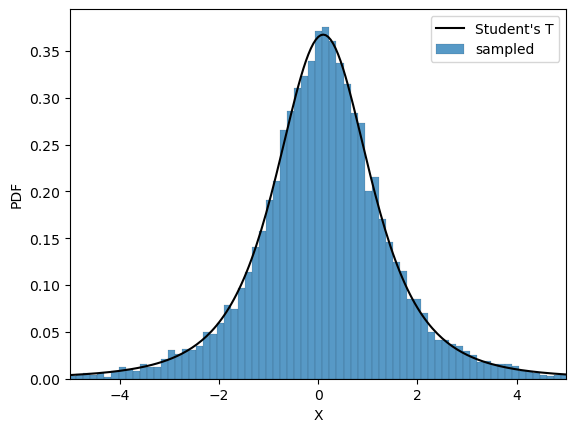

In [25]:
sbn.histplot(T,stat="density",discrete=False,label="sampled")
plt.plot(x,pdf,color="black",label="Student's T")
plt.xlabel("X")
plt.ylabel("PDF")
plt.legend()
plt.xlim(-5,5)

## Problem 3: Central Limit Theorem

In this problem  we will analyze how the mean on $N$ independent Poisson samples converge to a Gaussian distribution.

To do this we will
1. Generate  generate $N$ independent Poisson Random variables  $R$ times (for a total of  $N \times R$ independent samples)
2. We will average over the $N$ samples of each repeat to generate $R$ **samples of the mean** of $N$ independent Poisson samples.
3. We will compare the distribution of the mean to what is expected from the Central Limit Theorem.

We will work, as before, with Poisson random variables with parameter $\mu=2$

### Problem 3.1

Generate a matrix $(N=100,R=1,000)$ of independent Poisson  random samples using [numpy.random.Generator.poisson](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.poisson.html).

[HINT] Use a tuple $(N,R)$ as the  `size` argument to  [numpy.random.Generator.poisson](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.poisson.html).

You should obtain a $(N,R)$  numpy array of samples.

In [26]:
mu=2

In [27]:
N=100
R=1000

In [28]:
x=gen.poisson(lam=mu,size=(N,R))
x.shape

(100, 1000)

### Problem 3.2

Compute the sample means over each repeat by using function [numpy.darray.mean](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.mean.html) with
`axis=0` argument.

This will produce an array with $R=1,000$ mean samples. Each one is the  mean over $N=100$ independently generated Poisson samples.

In [29]:
mean=x.mean(axis=0)
mean.shape

(1000,)

### Problem 3.3

Compare the mean and standard deviation of the  sample means to the results expected from the central limit theorem:

If $X_i$, $i=1,\dots,N$  are independent, identically distributed, random variable with mean $\mu$ and variance $\sigma^2$,
then the sample mean
$$
    \hat{X} = \frac{1}{N}\sum_{i=1}^N X_i
$$
has mean and variance:
\begin{align}
    \mathbb{E}(\hat{X}) &= \mu \\
    \text{Var}(\hat{X}) &= \frac{\sigma^2}{N}
\end{align}

In [30]:
mean.mean(),mean.std()

(2.00356, 0.14100824940406856)

In [31]:
# for Poisson var=mu
mu,np.sqrt(mu/N)

(2, 0.1414213562373095)

### Problem 3.4

Using [`scipy.stats.norm`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) define a Gaussian random variable with mean and standard  deviation equal to 
\begin{align}
    \mathbb{E}(\hat{X}) &= \mu \\
    \text{Var}(\hat{X}) &= \frac{\sigma^2}{N}
\end{align}

[HINT] In function [`scipy.stats.norm`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) the mean parameter is called `loc`, and the standard deviation parameter is called `scale`.


In [32]:
gauss=stats.norm(loc=mu,scale=np.sqrt(mu/N))


### Problem 3.5

Using `npumpy.linspace` generate a uniformly spaced grid in the interval (0,4).

Compute the PDF on that grid of the Gaussian distribution defined in Problem 3.4


In [33]:

z=np.linspace(0,4,101)
G=gauss.pdf(z)

### Problem 3.6

Create a graph comparing the histogram of the sample means (as generated in Problem 3.2) to the Gaussian PDF predicted by the Central Limit Theorem as you computed in problem 3.5

[HINT] Use `matplotlib.pyplot.xlim` to fix the limit of the x axis to the interval (0,4)

(0.0, 4.0)

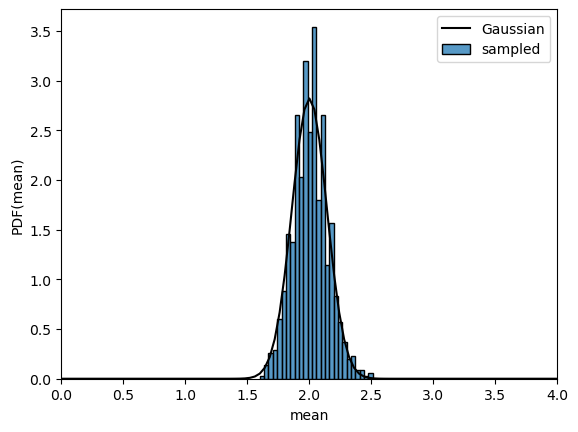

In [34]:
sbn.histplot(mean,stat="density",label="sampled")
plt.plot(z,G,color="black",label="Gaussian")
plt.xlabel("mean")
plt.ylabel("PDF(mean)")
plt.legend()
plt.xlim(0,4)

### Bonus Problem 3.7 

Write a function that given a sample size $N$ repeats all the steps of Problem 3.1 to 3.6.

The function will, given a size $N$:
    1, generate $R$ sample means from a Poisson distribution with mean $\mu=2$
    2. Compute the PDF of the Gaussian Distribution predicted by the central limit theorem on the interval (-5,10)
    2. Generate a graph comparing the histogram of  means to the Gaussian distribution predicted by the Central Limit theorem for that value of $N$.



[HINT] 
Fix the x range for the axis (using `pyplot.xlim`) to (-5,10) in all the graphs so that you can see the full range of the Poisson distribution as the mean converges to the central limit result.




In [35]:
def poisson_mean_samples(N):
    pass

In [36]:
def poisson_mean_samples(N):
    mu=2.0
    R=1_000
    counts=gen.poisson(lam=mu,size=(N,R))
    mean=counts.mean(axis=0)
    gauss=stats.norm(loc=mu,scale=np.sqrt(mu/N))
    z=np.linspace(-5,10,101)
    G=gauss.pdf(z)
    sbn.histplot(mean,stat="density",label="sampled")
    plt.plot(z,G,color="black",label="Gaussian")
    plt.xlabel("mean")
    plt.ylabel("PDF(mean)")
    plt.xlim(-5,10)
    plt.legend()
    

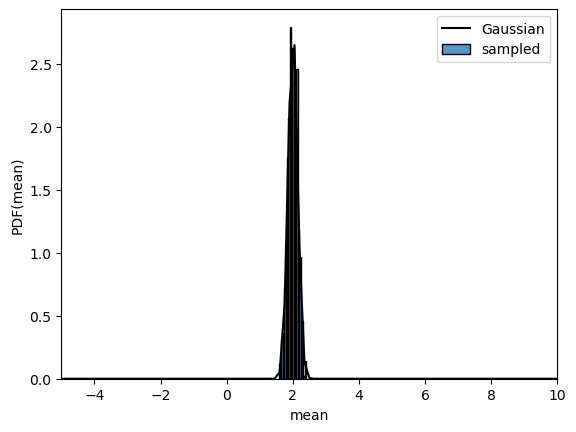

In [37]:
poisson_mean_samples(100)

### Bonus Problem 3.8

Use the function you wrote in Problem 3.7 to generate graphs for $N=1,5,10$ and $100$ samples

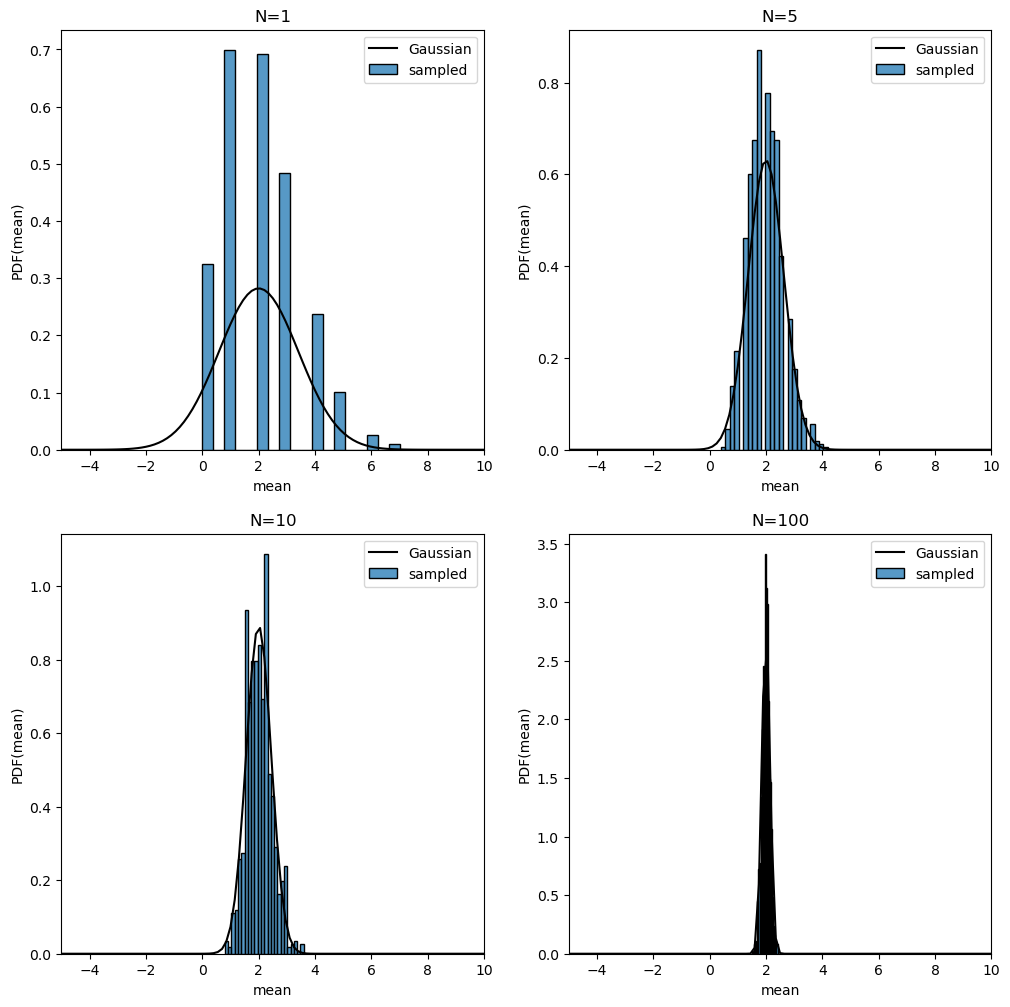

In [38]:
plt.figure(figsize=(12,12))
Ns=[1,5,10,100]
for i,N in enumerate(Ns):
    plt.subplot(221+i)
    plt.title(f"N={N}")
    poisson_mean_samples(N)

## Bonus Problem 4: Stock Market Empirical Distribution

In this problem we will look at the distribution of daily  returns for Verizon's (ticker VZ) stock.

We will compare the empirical (observed) distribution to a Gaussian and a Student's T distribution.


### Problem 4.1

1. Save the file `history_VZ.csv` and read it into a panda's `DataFrame`.

2. Display the first few rows of the file.

3. In this problem we will only use the columns `Date` and `Close`. Extract this two columns
into a `DataFrame`.

[HINT] set  the argument `parse_dates=["Date"]`  to `pandas.read_csv` so that dates will be interpreted properly.

In [39]:
data_dir="../../data/yfinance"

In [40]:
data=pd.read_csv(f"{data_dir}/history_VZ.csv",parse_dates=["Date"])
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2018-01-24,42.653540,43.144903,42.399934,42.970551,21080400,0.0,0
1,2018-01-25,43.018086,43.406423,42.804104,43.026012,18638700,0.0,0
2,2018-01-26,43.184526,43.390581,43.065647,43.366806,13077600,0.0,0
3,2018-01-29,42.463325,43.255847,42.320671,42.899212,17052600,0.0,0
4,2018-01-30,43.033945,43.192450,42.629760,42.716938,15401500,0.0,0


In [41]:
vz=data[["Date","Close"]]
vz.head()


,Date,Close
0,2018-01-24,42.970551
1,2018-01-25,43.026012
2,2018-01-26,43.366806
3,2018-01-29,42.899212
4,2018-01-30,42.716938


### Problem 4.2

Make a plot of `Close` vs `Date` to show how `VZ` stock has been changing over this time period.

Text(0, 0.5, 'Price')

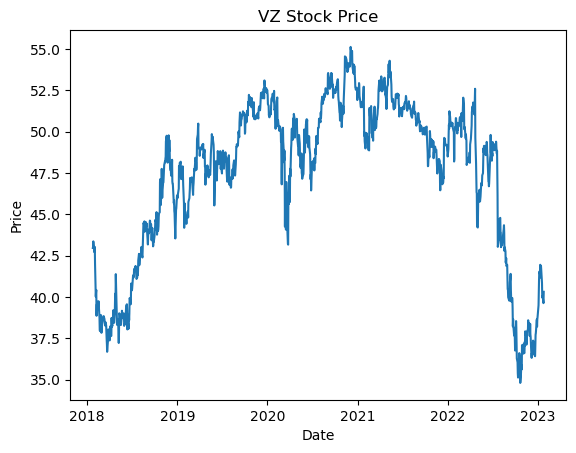

In [42]:
plt.title("VZ Stock Price")
plt.plot(vz["Date"],vz["Close"])
plt.xlabel("Date")
plt.ylabel("Price")

### Problem 4.3

1. Use [pandas.DataFrame.pct_change](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html) to compute the daily percentage change in the stock price. 
2. Save the returns to a variable and plot stock returns vs date 


Text(0.5, 1.0, 'VZ Daily Returns')

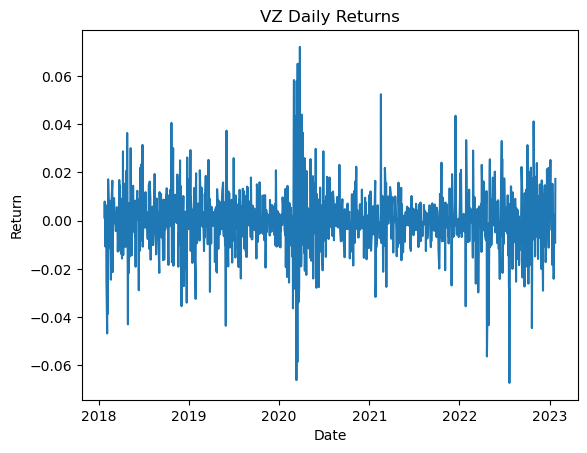

In [43]:

returns=vz["Close"].pct_change()
plt.plot(vz["Date"],returns)
plt.xlabel("Date")
plt.ylabel("Return")
plt.title("VZ Daily Returns")

### Problem 4.4

1. Remove any NAs (not available) values from the return series using [pandas.DataFrame.dropna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html) function.

2. Extract the returns into a numpy array using function  [pandas.DataFrame.to_numpy](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy) attribute.

In [44]:
R=returns.dropna().to_numpy()
R[:10]


array([ 0.0012907 ,  0.00792064, -0.01078231, -0.00424889,  0.00315396,
        0.00425369, -0.02430918, -0.04681019,  0.00653464,  0.00354094])

### Problem 4.5

Compute the mean and standard deviation of the time series of returns you obtained in Problem 4.4

In [45]:
mean=R.mean()
std=R.std()
len(R),mean,std

(1258, 2.8570073970465833e-05, 0.012586367263680892)

### Problem 4.6

1. Define a Gaussian random variable with the same mean and standard deviation as the  VZ stock returns  computed in Problem 4.5
2. Make a graph comparing the histogram of returns to the Gaussian distribution

[HINT] Set the range of the graph to +/- 4 standard deviations of the distribution

In [46]:
g=stats.norm(loc=mean,scale=std)
g

In [47]:
z=np.linspace(mean-4*std,mean+4*std,101)
pdf=g.pdf(z)

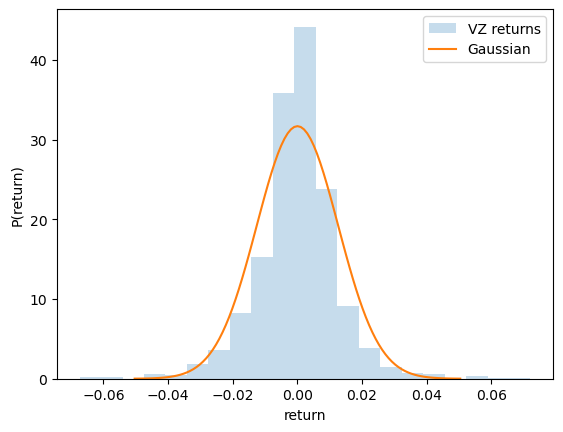

In [48]:
plt.hist(R,bins=21,alpha=0.25,density=True,label="VZ returns")
plt.plot(z,pdf,label="Gaussian")
plt.xlabel("return")
plt.ylabel("P(return)")
plt.legend()

### Problem 4.7 

Use the method [scipy.stats.t.fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.fit.html#scipy.stats.rv_continuous.fit)
to estimate the parameters $n,\mu,\sigma$ of a Student's T distribution from the VZ Returns you have computed.


In [49]:
df,loc,scale=stats.t.fit(R)
df,loc,scale

(3.004659259856287, 0.0003526403381212856, 0.008015530371327961)

### Problem 4.8

1. Define a [scipy.stats.t](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html) distribution with the parameters you just estimated in Problem 4.7
2. Compute the Student's T  PDF.
3. Make a graph comparing VZ's return histogram to the Gaussian and  Student's T  PDFs.
4. Which distribution fit's better VZ returns, a Gaussian or a Student's T?

In [50]:
t=stats.t(df=df,loc=loc,scale=scale)
pdf_t=t.pdf(z)

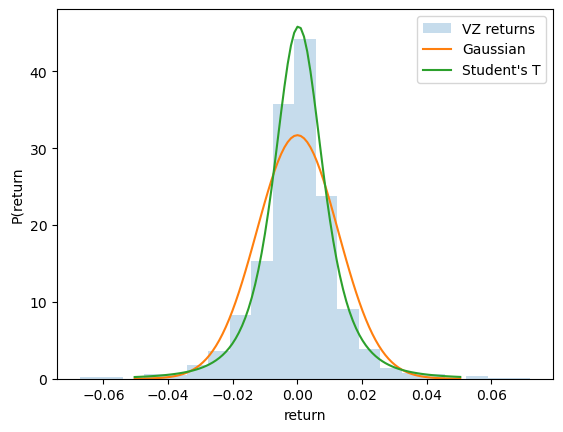

In [51]:
plt.hist(R,bins=21,alpha=0.25,density=True,label="VZ returns")
plt.plot(z,pdf,label="Gaussian")
plt.plot(z,pdf_t,label="Student's T")
plt.xlabel("return")
plt.ylabel("P(return")
plt.legend()

**Student's T first better.**
